In [1]:
using Pkg
Pkg.build("FastClosures")

Precompiling packages...
   5771.6 ms  ✓ SQRLab
  1 dependency successfully precompiled in 8 seconds. 456 already precompiled.
  1 dependency had output during precompilation:
┌ SQRLab
│  0.000075 seconds (92 allocations: 6.188 KiB)
└  


In [2]:
import Pkg
using Revise
using SQRLab

using IonSim
using QuantumOptics
using PyPlot

In [3]:
t = create_standard_chamber()
names(SQRLab)

10-element Vector{Symbol}:
 :SQRLab
 :bfield_detune
 :create_standard_chamber
 :pi2_pulse
 :pulse_dynamic
 :run_ramsey
 :run_simulation
 :run_simulation_hamiltonian
 :simple_pulse
 :simulate_decoherence

In [4]:
using Printf
function print_pulse_schedule(chamber; t_start=0.0, t_end=30.0, step=0.1)
        L = chamber.lasers[1]
        I_func = L.I
        phi_func = L.ϕ
        
        println("\n--- Laser Pulse Schedule ---")
        println("Time (μs) | Intensity (W/m²)     | Phase (rad)")
        println("----------------------------------------------")
        
        # We assume 't' is in microseconds because hamiltonian(timescale=1e-6) is used
        for t in t_start:step:t_end
            i_val = I_func(t)
            p_val = phi_func(t)
            
            # Only print lines where the laser is ON to keep output clean
            if i_val > 1e-9
                # Format: Time aligned right, Intensity scientific, Phase fixed
                Printf = @eval using Printf
                @Printf.printf "%9.2f | %18.2e | %5.2f\n" t i_val p_val
            end
        end
        println("----------------------------------------------\n")
    end

print_pulse_schedule (generic function with 1 method)

 12.617866 seconds (43.84 M allocations: 1.975 GiB, 6.53% gc time, 94.93% compilation time: <1% of which was recompilation)
  0.260560 seconds (5.86 M allocations: 158.762 MiB, 17.12% gc time)


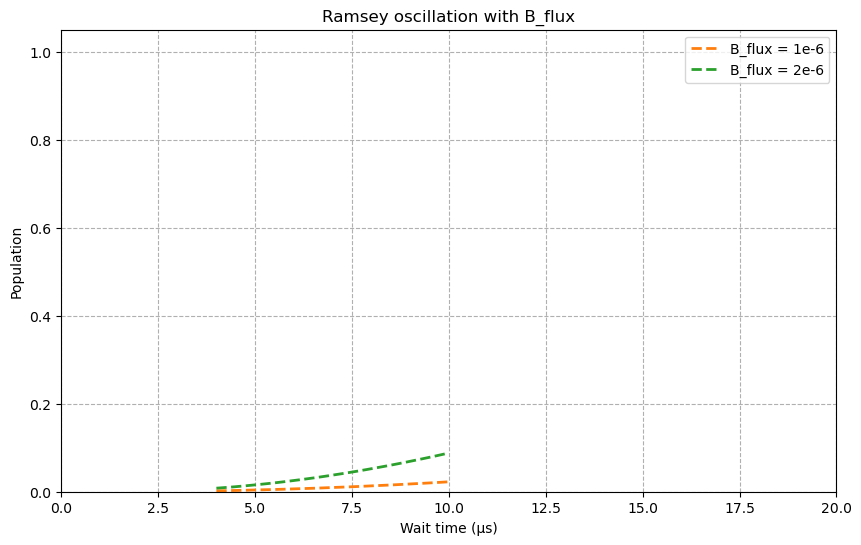

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


In [5]:
waittime = 4:0.1:10
figure(figsize=(10, 6))
    @time x, y = run_ramsey(t, waittime, 1e-6)
    plot(x, y, label="B_flux = 1e-6", color="C1", linestyle="--", linewidth=2)

    @time x1, y1 = run_ramsey(t, waittime, 2e-6)
        plot(x1, y1, label="B_flux = 2e-6", color="C2", linestyle="--", linewidth=2)

    
xlim(0, 20)
xlabel("Wait time (μs)")
ylabel("Population")
title("Ramsey oscillation with B_flux")
ylim(0, 1.05)

grid(true, linestyle="--")
legend()
show()
display(gcf())

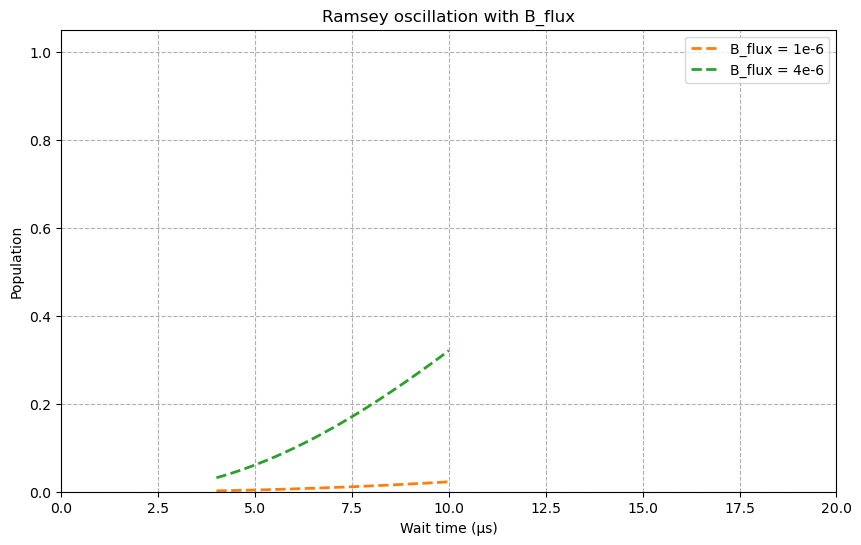

In [6]:
waittime = 4:0.1:10
figure(figsize=(10, 6))
    x, y = run_ramsey(t, waittime, 1e-6)
    plot(x, y, label="B_flux = 1e-6", color="C1", linestyle="--", linewidth=2)

    x1, y1 = run_ramsey(t, waittime, 4e-6)
        plot(x1, y1, label="B_flux = 4e-6", color="C2", linestyle="--", linewidth=2)

    
xlim(0, 20)
xlabel("Wait time (μs)")
ylabel("Population")
title("Ramsey oscillation with B_flux")
ylim(0, 1.05)

grid(true, linestyle="--")
legend()
show()
display(gcf())

  0.541076 seconds (17.46 M allocations: 474.966 MiB, 6.71% gc time)
  0.586357 seconds (16.01 M allocations: 437.014 MiB, 8.24% gc time)


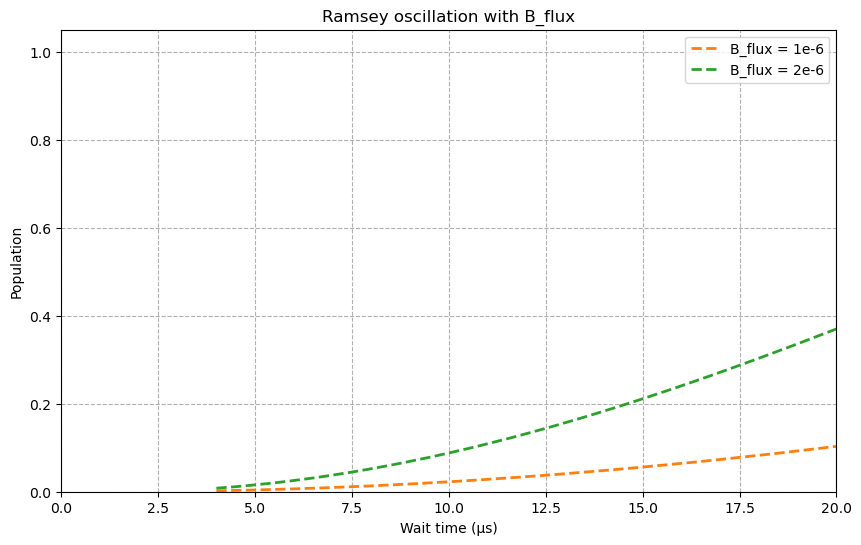

In [7]:
waittime = 4:0.1:20
figure(figsize=(10, 6))
    @time x, y = run_ramsey(t, waittime, 1e-6)
    plot(x, y, label="B_flux = 1e-6", color="C1", linestyle="--", linewidth=2)

    @time x1, y1 = run_ramsey(t, waittime, 2e-6)
        plot(x1, y1, label="B_flux = 2e-6", color="C2", linestyle="--", linewidth=2)

    
xlim(0, 20)
xlabel("Wait time (μs)")
ylabel("Population")
title("Ramsey oscillation with B_flux")
ylim(0, 1.05)

grid(true, linestyle="--")
legend()
show()
display(gcf())

  1.291328 seconds (40.21 M allocations: 1.082 GiB, 8.25% gc time)
  1.338748 seconds (41.94 M allocations: 1.126 GiB, 8.66% gc time)


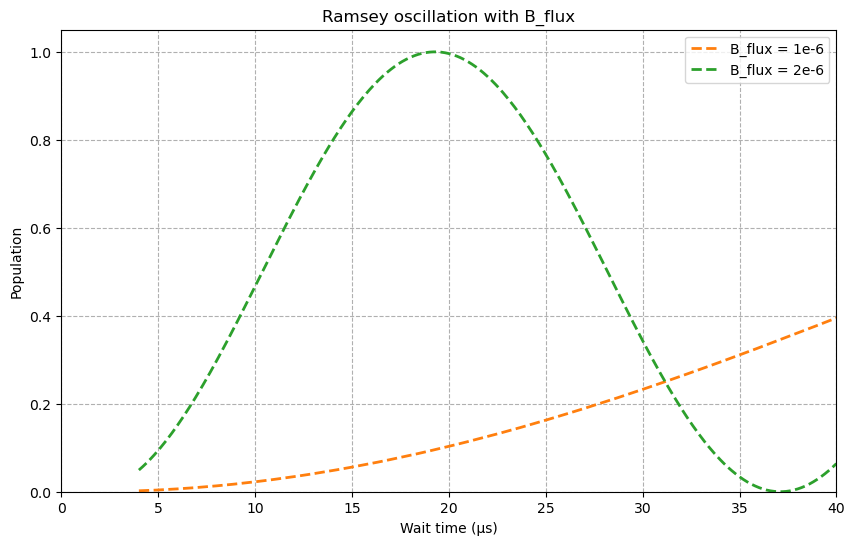

In [8]:
waittime = 4:0.1:40
figure(figsize=(10, 6))
    @time x, y = run_ramsey(t, waittime, 1e-6)
    plot(x, y, label="B_flux = 1e-6", color="C1", linestyle="--", linewidth=2)

    @time x1, y1 = run_ramsey(t, waittime, 5e-6)
        plot(x1, y1, label="B_flux = 2e-6", color="C2", linestyle="--", linewidth=2)

    
xlim(0, 40)
xlabel("Wait time (μs)")
ylabel("Population")
title("Ramsey oscillation with B_flux")
ylim(0, 1.05)

grid(true, linestyle="--")
legend()
show()
display(gcf())

In [9]:
Pkg.add("ProgressMeter")
using Distributions # You'll need to add this package!
using ProgressMeter # For a nice progress bar

   Resolving package versions...
     Project No packages added to or removed from `C:\Users\jewoo\projects\TestJulia\Project.toml`
    Manifest No packages added to or removed from `C:\Users\jewoo\projects\TestJulia\Manifest.toml`


In [ ]:

B_rms_1 = 1e-6  # (T) The final shielded noise from the paper
B_rms_2 = 2e-6 # (T) Example for 20 dB worse noise
B_rms_3 = 3e-6 # (T) Example for 20 dB worse noise

# Create the Gaussian distribution for the magnetic field noise
# This replaces your B_span!
noise_distribution_1 = Normal(0, B_rms_1)
noise_distribution_2 = Normal(0, B_rms_2)
noise_distribution_3 = Normal(0, B_rms_3)


figure(figsize=(10, 6))
    @time x, y = simulate_decoherence(t, noise_distribution_1)
    plot(x, y, label="Simulation (σ_B = 1 mT)", color="C1", linestyle="--", linewidth=2)

    # @time x1, y1 = run_decoherence(t, noise_distribution_2)
    #     plot(x1, y1, label="B_flux = 2e-6", color="C2", linestyle="--", linewidth=2)

    # @time x2, y2 = run_decoherence(t, noise_distribution_3)
    #     plot(x2, y2, label="B_flux = 3e-6", color="C3", linestyle="--", linewidth=2)

    
xlim(0, 40)
xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())

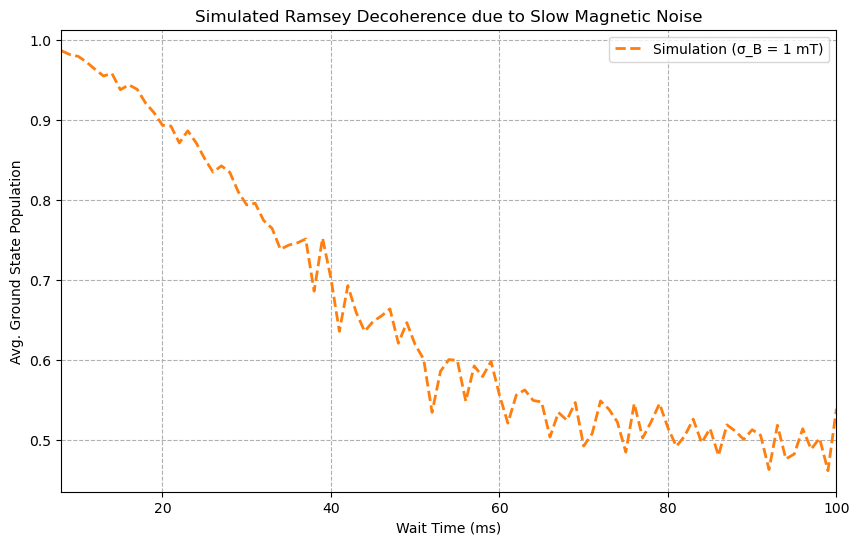

In [11]:
figure(figsize=(10, 6))
    plot(x, y, label="Simulation (σ_B = 1 mT)", color="C1", linestyle="--", linewidth=2)

    # @time x1, y1 = run_decoherence(t, noise_distribution_2)
    #     plot(x1, y1, label="B_flux = 2e-6", color="C2", linestyle="--", linewidth=2)

    # @time x2, y2 = run_decoherence(t, noise_distribution_3)
    #     plot(x2, y2, label="B_flux = 3e-6", color="C3", linestyle="--", linewidth=2)

    
xlim(8, 100)
xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())

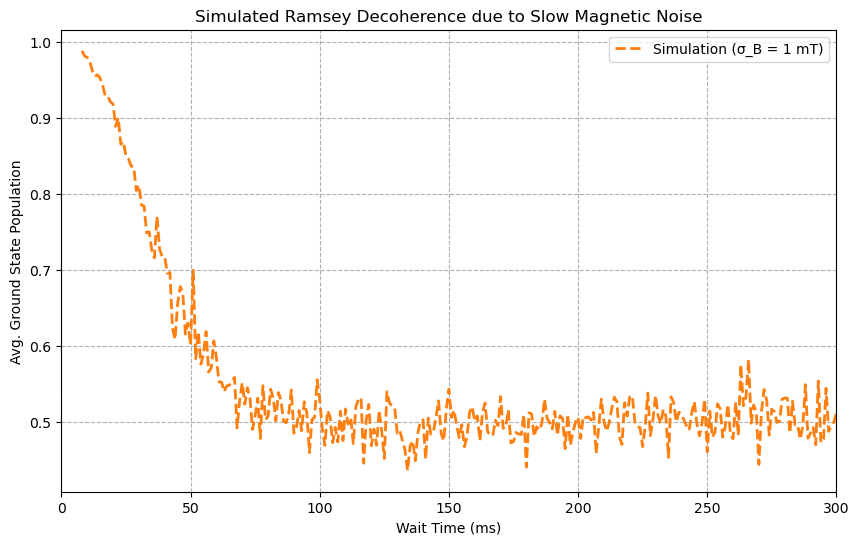

In [14]:

B_rms_1 = 1e-6  # (T) The final shielded noise from the paper
B_rms_2 = 2e-6 # (T) Example for 20 dB worse noise
B_rms_3 = 3e-6 # (T) Example for 20 dB worse noise

# Create the Gaussian distribution for the magnetic field noise
# This replaces your B_span!
noise_distribution_1 = Normal(0, B_rms_1)
noise_distribution_2 = Normal(0, B_rms_2)
noise_distribution_3 = Normal(0, B_rms_3)


figure(figsize=(10, 6))
    @time x, y = simulate_decoherence(t, 300, noise_distribution_1)
    plot(x, y, label="Simulation (σ_B = 1 mT)", color="C1", linestyle="--", linewidth=2)

    # @time x1, y1 = run_decoherence(t, noise_distribution_2)
    #     plot(x1, y1, label="B_flux = 2e-6", color="C2", linestyle="--", linewidth=2)

    # @time x2, y2 = run_decoherence(t, noise_distribution_3)
    #     plot(x2, y2, label="B_flux = 3e-6", color="C3", linestyle="--", linewidth=2)

    
xlim(0, 300)
xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())

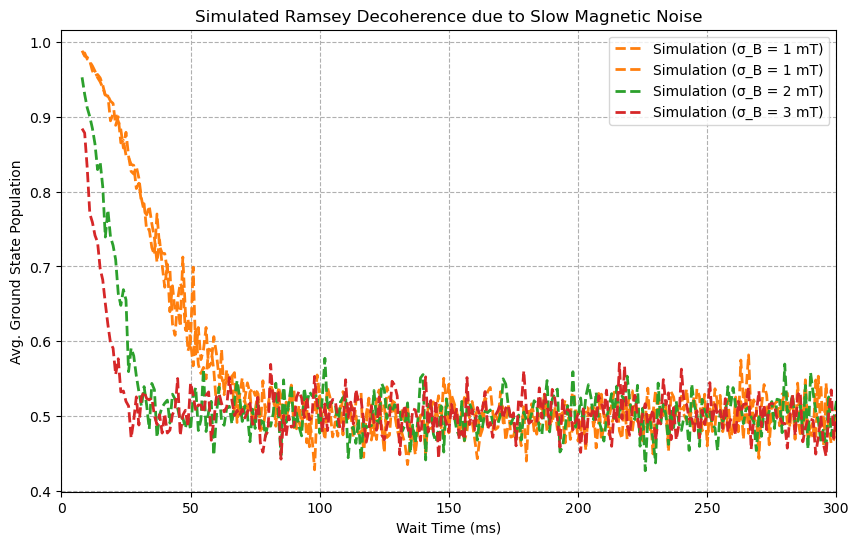

In [15]:
@time x, y = simulate_decoherence(t, 300, noise_distribution_1)
    plot(x, y, label="Simulation (σ_B = 1 mT)", color="C1", linestyle="--", linewidth=2)
    @time x, y = simulate_decoherence(t, 300, noise_distribution_2)
    plot(x, y, label="Simulation (σ_B = 2 mT)", color="C2", linestyle="--", linewidth=2)
    @time x, y = simulate_decoherence(t, 300, noise_distribution_3)
    plot(x, y, label="Simulation (σ_B = 3 mT)", color="C3", linestyle="--", linewidth=2)
xlim(0, 300)

xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())